# 2.5.2 Nearest-neighbour methods

In [1]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

## Load oil flow data

Used PlotDigitizer on Figure 2.28.

In [2]:
color_list = ['r', 'g', 'b']

In [3]:
data_r = np.genfromtxt('02_28_data/02_28_r.csv', delimiter=',', skip_header=1)
data_g = np.genfromtxt('02_28_data/02_28_g.csv', delimiter=',', skip_header=1)
data_b = np.genfromtxt('02_28_data/02_28_b.csv', delimiter=',', skip_header=1)

In [4]:
X = np.concatenate([data_r, data_g, data_b], axis=0)

In [5]:
y = np.concatenate([np.zeros(len(data_r)), np.ones(len(data_g)), 2 * np.ones(len(data_b))])

In [6]:
print(X.shape, y.shape)

(90, 2) (90,)


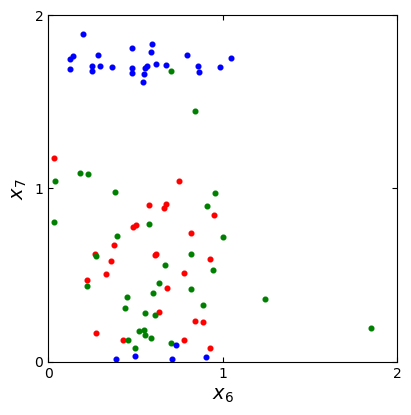

In [7]:
plt.figure(figsize=(4.5, 4.5))
for i, y_i in enumerate(np.unique(y)):
        plt.scatter(X[y==y_i, 0], X[y==y_i, 1], color=color_list[i], lw=1.2, s=10)    
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.xticks(np.arange(0, 2.5, 1.0))
plt.yticks(np.arange(0, 2.5, 1.0))
plt.xlabel(r'$x_6$', fontsize=14)
plt.ylabel(r'$x_7$', fontsize=14)
plt.tick_params(direction='in', which='both', right=True, top=True)
plt.show()

# KNN classifier

In [8]:
class KNN:
    def __init__(self, K):
        self.K = K
        self.color_list = ['r', 'g', 'b']
        self.model = KNeighborsClassifier(n_neighbors=K)
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.model.fit(X, y)
        
    def predict(self):
        self.xx, self.yy = np.meshgrid(np.linspace(0, 2, 200), np.linspace(0, 2, 200))
        z = self.model.predict(np.c_[self.xx.ravel(), self.yy.ravel()])
        self.zz = z.reshape(self.xx.shape)
    
    def plot(self):
        cmap = ListedColormap(self.color_list)
        plt.figure(figsize=(4.5, 4.5))
        plt.pcolormesh(self.xx, self.yy, self.zz, alpha=0.2, cmap=cmap)
        for i, y_i in enumerate(np.unique(y)):
            plt.scatter(self.X[self.y==y_i, 0], self.X[self.y==y_i, 1], color=color_list[i], lw=1.2, s=10)
        plt.xlim(0, 2)
        plt.ylim(0, 2)
        plt.xticks(np.arange(0, 2.5, 1.0))
        plt.yticks(np.arange(0, 2.5, 1.0))
        plt.xlabel(r'$x_6$', fontsize=14)
        plt.ylabel(r'$x_7$', fontsize=14)
        plt.title(f'K = {self.model.n_neighbors}', fontsize=14)
        plt.tick_params(direction='in', which='both', right=True, top=True)
        plt.show()

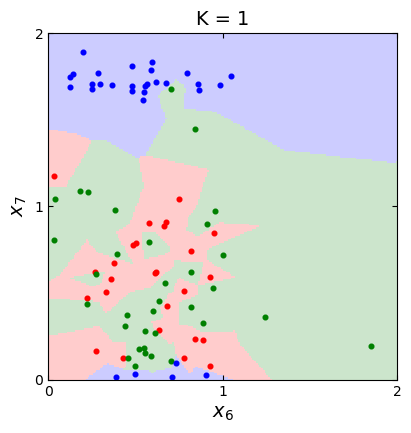

In [9]:
knn = KNN(K=1)
knn.fit(X, y)
knn.predict()
knn.plot()

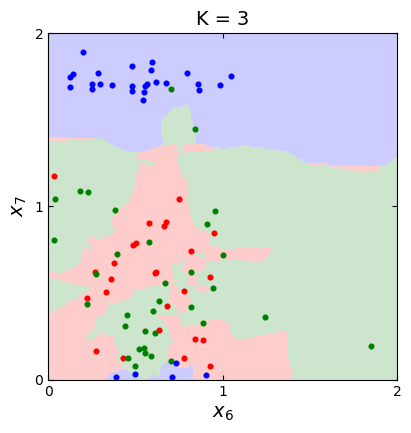

In [10]:
knn = KNN(K=3)
knn.fit(X, y)
knn.predict()
knn.plot()

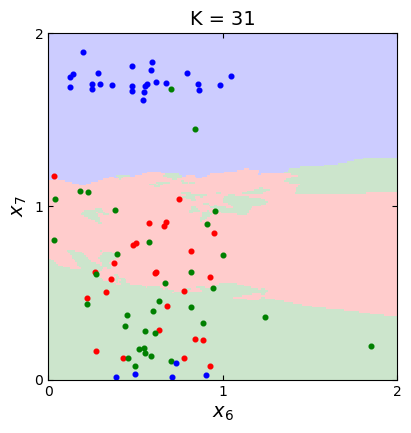

In [11]:
knn = KNN(K=31)
knn.fit(X, y)
knn.predict()
knn.plot()